In [39]:
import ROOT
import my_library.common_analysis_tools as tools
import my_library.kinematic_cuts as cuts
import my_library.constants as constants
import my_library.gluex_style as gxs
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [40]:
df_cs_final_pipkmks = pd.read_csv('/work/halld/home/viducic/data/fit_params/pipkmks/cs_final.csv')
df_cs_final_pimkpks = pd.read_csv('/work/halld/home/viducic/data/fit_params/pimkpks/cs_final.csv')

df_cs_final_pipkmks['cs_stat_error'] = np.where(True, df_cs_final_pipkmks['cross_section'] * df_cs_final_pipkmks['stat_error'], 0)
df_cs_final_pimkpks['cs_stat_error'] = np.where(True, df_cs_final_pimkpks['cross_section'] * df_cs_final_pimkpks['stat_error'], 0)

df_cs_final_pipkmks['cs_error'] = np.where(True, df_cs_final_pipkmks['cross_section'] * df_cs_final_pipkmks['total_percent_error'], 0)
df_cs_final_pimkpks['cs_error'] = np.where(True, df_cs_final_pimkpks['cross_section'] * df_cs_final_pimkpks['total_percent_error'], 0)

In [41]:
gluex_markers = {
    8: ROOT.kFullCircle,
    9: ROOT.kFullSquare,
    10: ROOT.kFullTriangleUp,
    11: ROOT.kFullDiamond
}

pipkmks_colors = {
    8: ROOT.kBlue,
    9: ROOT.kBlue+1,
    10: ROOT.kBlue+2,
    11: ROOT.kBlue+3
}

pimkpks_colors = {
    8: ROOT.kRed,
    9: ROOT.kRed+1,
    10: ROOT.kRed+2,
    11: ROOT.kRed+3
}

cs_stat_grouped_pipkmks = df_cs_final_pipkmks.groupby('beam_energy')
cs_stat_grouped_pimkpks = df_cs_final_pimkpks.groupby('beam_energy')
cs_stat_err_pipkmks_graphs = []
cs_stat_err_pimkpks_graphs = []
cs_total_err_pipkmks_graphs = []
cs_total_err_pimkpks_graphs = []
for beam_energy, group in cs_stat_grouped_pipkmks:
    group_pim = cs_stat_grouped_pimkpks.get_group(beam_energy)
    graph_pip = ROOT.TGraphErrors(len(group.t_bin_middle.to_numpy()), group.t_bin_middle.to_numpy(dtype='d'), group.cross_section.to_numpy(), group.t_bin_width.to_numpy(), group.cs_stat_error.to_numpy())
    graph_pim = ROOT.TGraphErrors(len(group_pim.t_bin_middle.to_numpy()), group_pim.t_bin_middle.to_numpy(dtype='d'), group_pim.cross_section.to_numpy(), group_pim.t_bin_width.to_numpy(), group_pim.cs_stat_error.to_numpy())
    graph_pip.SetName(f'pipkmks_{beam_energy}')
    graph_pim.SetName(f'pimkpks_{beam_energy}')
    graph_pip.SetMarkerColor(pipkmks_colors[beam_energy])
    graph_pim.SetMarkerColor(pimkpks_colors[beam_energy])
    graph_pip.SetMarkerStyle(gluex_markers[beam_energy])
    graph_pim.SetMarkerStyle(gluex_markers[beam_energy])
    graph_pip.SetLineColor(pipkmks_colors[beam_energy])
    graph_pim.SetLineColor(pimkpks_colors[beam_energy])
    graph_pip.SetLineWidth(2)
    graph_pim.SetLineWidth(2)
    graph_pip.GetXaxis().SetTitle('-t [GeV^{2}]')
    graph_pim.GetXaxis().SetTitle('-t [GeV^{2}]')
    graph_pip.GetYaxis().SetTitle('#frac{d#sigma}{dt} [nb/GeV^{2}]')
    graph_pim.GetYaxis().SetTitle('#frac{d#sigma}{dt} [nb/GeV^{2}]')
    graph_pip.GetYaxis().SetTitleOffset(1.6)
    graph_pim.GetYaxis().SetTitleOffset(1.6)
    graph_pip.SetTitle(' E_{#gamma} = ' + str(beam_energy) + ' GeV')
    graph_pim.SetTitle(' E_{#gamma} = ' + str(beam_energy) + ' GeV')
    cs_stat_err_pipkmks_graphs.append(graph_pip)
    cs_stat_err_pimkpks_graphs.append(graph_pim)

    graph_pip_total = ROOT.TGraphErrors(len(group.t_bin_middle.to_numpy()), group.t_bin_middle.to_numpy(dtype='d'), group.cross_section.to_numpy(), group.t_bin_width.to_numpy(), group.cs_error.to_numpy())
    graph_pim_total = ROOT.TGraphErrors(len(group_pim.t_bin_middle.to_numpy()), group_pim.t_bin_middle.to_numpy(dtype='d'), group_pim.cross_section.to_numpy(), group_pim.t_bin_width.to_numpy(), group_pim.cs_error.to_numpy())
    graph_pip_total.SetName(f'pipkmks_{beam_energy}')
    graph_pim_total.SetName(f'pimkpks_{beam_energy}')
    graph_pip_total.SetMarkerColor(pipkmks_colors[beam_energy])
    graph_pim_total.SetMarkerColor(pimkpks_colors[beam_energy])
    graph_pip_total.SetMarkerStyle(gluex_markers[beam_energy])
    graph_pim_total.SetMarkerStyle(gluex_markers[beam_energy])
    graph_pip_total.SetLineColor(pipkmks_colors[beam_energy])
    graph_pim_total.SetLineColor(pimkpks_colors[beam_energy])
    graph_pip_total.SetLineWidth(2)
    graph_pim_total.SetLineWidth(2)
    graph_pip_total.GetXaxis().SetTitle('-t [GeV^{2}]')
    graph_pim_total.GetXaxis().SetTitle('-t [GeV^{2}]')
    graph_pip_total.GetYaxis().SetTitle('#frac{d#sigma}{dt} [nb/GeV^{2}]')
    graph_pim_total.GetYaxis().SetTitle('#frac{d#sigma}{dt} [nb/GeV^{2}]')
    graph_pip_total.GetYaxis().SetTitleOffset(1.6)
    graph_pim_total.GetYaxis().SetTitleOffset(1.6)
    graph_pip_total.SetTitle(' E_{#gamma} = ' + str(beam_energy) + ' GeV')
    graph_pim_total.SetTitle(' E_{#gamma} = ' + str(beam_energy) + ' GeV')
    graph_pip_total.SetFillColorAlpha(pipkmks_colors[beam_energy], 0.3)
    graph_pim_total.SetFillColorAlpha(pimkpks_colors[beam_energy], 0.3)
    graph_pip_total.SetFillStyle(3001)
    graph_pim_total.SetFillStyle(3001)
    cs_total_err_pipkmks_graphs.append(graph_pip_total)
    cs_total_err_pimkpks_graphs.append(graph_pim_total)

In [46]:
c = ROOT.TCanvas('c', 'c', 1100, 800)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


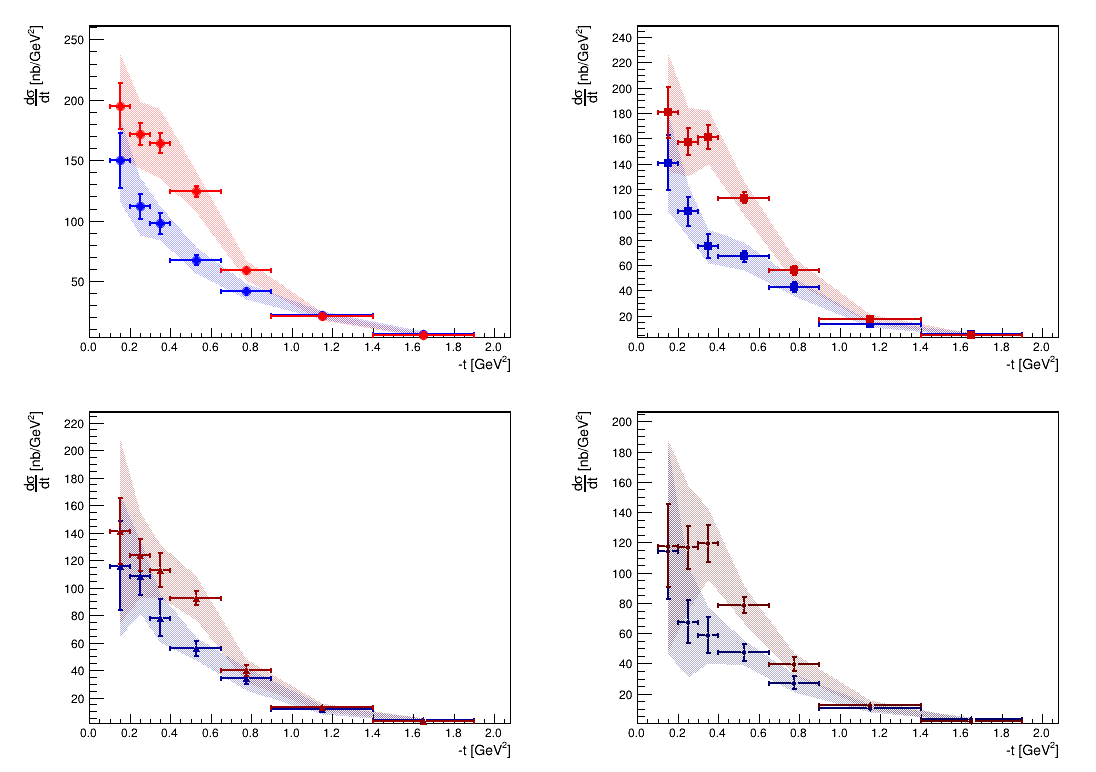

In [47]:
c.Clear()
c.Divide(2, 2)
for i in range(0, 4):
    pad = c.cd(i+1)
    pad.SetLeftMargin(0.15)
    cs_total_err_pimkpks_graphs[i].Draw('A3')
    cs_total_err_pipkmks_graphs[i].Draw('3')
    cs_stat_err_pipkmks_graphs[i].Draw('P')
    cs_stat_err_pimkpks_graphs[i].Draw('P')

c.Draw()

